In [1]:
import pandas as pd
df = pd.read_excel('word_count_test_outputs.xlsx')
df.columns

Index(['Model', 'Word Count', 'Sampling', 'CI Min', '"CI Min" Max'], dtype='object')

In [2]:
import matplotlib.pyplot as plt
df = df.loc[df['Sampling'] == 'NS']
df = df[['Model', 'Word Count', '"CI Min" Max']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 195
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         66 non-null     object 
 1   Word Count    66 non-null     int64  
 2   "CI Min" Max  66 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [3]:
df['Model'].unique()

array(['CT', 'MLP', 'MLR', 'MNB', 'RF', 'SVM'], dtype=object)

In [4]:
ct = df.loc[df['Model'] == 'CT']
ct = ct.set_index('Word Count')

mlp = df.loc[df['Model'] == 'MLP']
mlp = mlp.set_index('Word Count')

mlr = df.loc[df['Model'] == 'MLR']
mlr = mlr.set_index('Word Count')

mnb = df.loc[df['Model'] == 'MNB']
mnb = mnb.set_index('Word Count')

rf = df.loc[df['Model'] == 'RF']
rf = rf.set_index('Word Count')

svm = df.loc[df['Model'] == 'SVM']
svm = svm.set_index('Word Count')

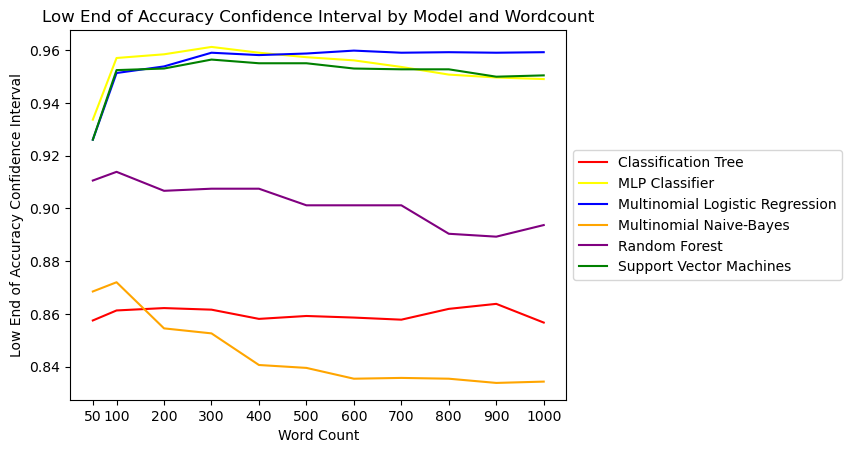

In [5]:
import matplotlib.ticker as ticker
plt.plot(ct['"CI Min" Max'], label = "Classification Tree", color='red') 
plt.plot(mlp['"CI Min" Max'], label = "MLP Classifier", color='yellow') 
plt.plot(mlr['"CI Min" Max'], label = "Multinomial Logistic Regression", color='blue') 
plt.plot(mnb['"CI Min" Max'], label = "Multinomial Naive-Bayes", color='orange') 
plt.plot(rf['"CI Min" Max'], label = "Random Forest", color='purple') 
plt.plot(svm['"CI Min" Max'], label = "Support Vector Machines", color='green')  
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Low End of Accuracy Confidence Interval by Model and Wordcount')
plt.xlabel('Word Count')
plt.ylabel('Low End of Accuracy Confidence Interval')
plt.xticks([50,100,200,300,400,500,600,700,800,900,1000])
plt.show()

In [6]:
count_50 = df.loc[df['Word Count'] == 50]

count_100 = df.loc[df['Word Count'] == 100]

count_200 = df.loc[df['Word Count'] == 200]

count_300 = df.loc[df['Word Count'] == 300]

count_400 = df.loc[df['Word Count'] == 400]

count_500 = df.loc[df['Word Count'] == 500]

count_600 = df.loc[df['Word Count'] == 600]

count_700 = df.loc[df['Word Count'] == 700]

count_800 = df.loc[df['Word Count'] == 800]

count_900 = df.loc[df['Word Count'] == 900]

count_1000 = df.loc[df['Word Count'] == 1000]

In [7]:
counts = [count_50['"CI Min" Max'],count_100['"CI Min" Max'],count_200['"CI Min" Max'],count_300['"CI Min" Max'],count_400['"CI Min" Max'],count_500['"CI Min" Max'],count_600['"CI Min" Max'],count_700['"CI Min" Max'],count_800['"CI Min" Max'],count_900['"CI Min" Max'],count_1000['"CI Min" Max']]
for i in counts:
    print(f'Mean: {i.mean()}')

Mean: 0.9037499999999999
Mean: 0.9180333333333333
Mean: 0.9148166666666667
Mean: 0.9164333333333333
Mean: 0.9130999999999999
Mean: 0.9118666666666666
Mean: 0.9107333333333334
Mean: 0.91005
Mean: 0.9084333333333333
Mean: 0.9076166666666666
Mean: 0.9072666666666667


In [8]:
means = {'wrd_cnt':[50,100,200,300,400,500,600,700,800,900,1000],
        'mean_lower_ci':[0.9037,0.9180,0.9148,0.9164,0.9131,0.9119,0.9107,0.9101,0.9084,0.9076,0.9073]}

In [9]:
means = pd.DataFrame(data=means)

In [10]:
means = means.set_index('wrd_cnt')

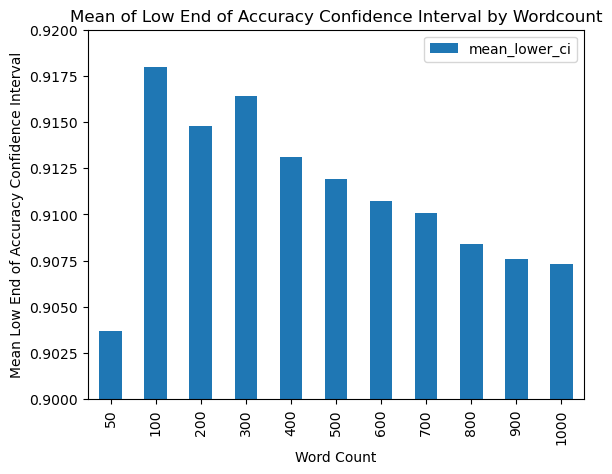

In [12]:
ax = means.plot(kind='bar',
                title = 'Mean of Low End of Accuracy Confidence Interval by Wordcount',
                xlabel = 'Word Count', ylabel = 'Mean Low End of Accuracy Confidence Interval')
plt.ylim(0.9,0.92)
plt.show()